# Visualization of probabilistic forecast verification

This notebook reproduces the results found in the publication _"An R package to visualize and communicate uncertainty in seasonal
climate prediction"_ by M. D. Frías et al (2018) doi:[https://doi.org/10.1016/j.envsoft.2017.09.008](https://doi.org/10.1016/j.envsoft.2017.09.008). Refer to this work for full detail on the analyses performed here.

## Load libraries

`visualizeR` will load also `transformeR`as a dependency.

In [1]:
library(visualizeR)

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.0 (2021-03-17) is loaded


Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.0 (2020-05-23) is loaded


Get the latest stable version (1.6.1) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



## Data loading

We will use the sample data included in the ``isualizeR` library, which contains CFS hindcast and the operative forecast for year 2016. NCEP/NCAR reanalysis will be used for verification.

In [2]:
# Data load
data(tas.cfs)
data(tas.cfs.operative.2016)
data(tas.ncep)

In [3]:
# Adjusting data spatial resolution to 5º lat-lon resolution
newgrid <- getGrid(tas.cfs) 
attr(newgrid, "resX") <- 5
attr(newgrid, "resY") <- 5
lower.res <- function(x, newgrid) {
  interpGrid(x, new.coordinates = newgrid, method = "bilinear", bilin.method = "fields")
}
obs <- lower.res(tas.ncep, newgrid)
hindcast <- lower.res(tas.cfs, newgrid)
forecast <- lower.res(tas.cfs.operative.2016, newgrid)

Warning message in interpGrid(x, new.coordinates = newgrid, method = "bilinear", :
“The new latitudes are outside the data extent”
[2022-08-30 21:42:12] Performing bilinear interpolation... may take a while

[2022-08-30 21:42:13] Done

[2022-08-30 21:42:13] Performing bilinear interpolation... may take a while

[2022-08-30 21:42:13] Interpolating member 1 out of 24

[2022-08-30 21:42:13] Interpolating member 2 out of 24

[2022-08-30 21:42:13] Interpolating member 3 out of 24

[2022-08-30 21:42:13] Interpolating member 4 out of 24

[2022-08-30 21:42:14] Interpolating member 5 out of 24

[2022-08-30 21:42:14] Interpolating member 6 out of 24

[2022-08-30 21:42:14] Interpolating member 7 out of 24

[2022-08-30 21:42:14] Interpolating member 8 out of 24

[2022-08-30 21:42:15] Interpolating member 9 out of 24

[2022-08-30 21:42:15] Interpolating member 10 out of 24

[2022-08-30 21:42:15] Interpolating member 11 out of 24

[2022-08-30 21:42:15] Interpolating member 12 out of 24

[2022-08-30 

# Bubble plot

Bubble plots combine in a geographic map several aspects of the seasonal forecast system with different levels of complexity using three properties of the bubbles: colour, size and transparency.

In this example, we show the bubble plot for the December, 2015 to February, 2016 2-m air temperature forecast issued in November, 2015 by the CFSv2 forecast system (24 members).

In [4]:
subtitle <- sprintf("Reference data: NCEP;  Hindcast: CFS (%d members); %d-%d", 
                    length(hindcast$Members),
                    getYearsAsINDEX(hindcast)[1],
                    tail(getYearsAsINDEX(hindcast),1)
)

The colour of the bubbles indicates the most likely tercile. In the following plot, only colour of the bubble is plotted indicating the most likely tercile 

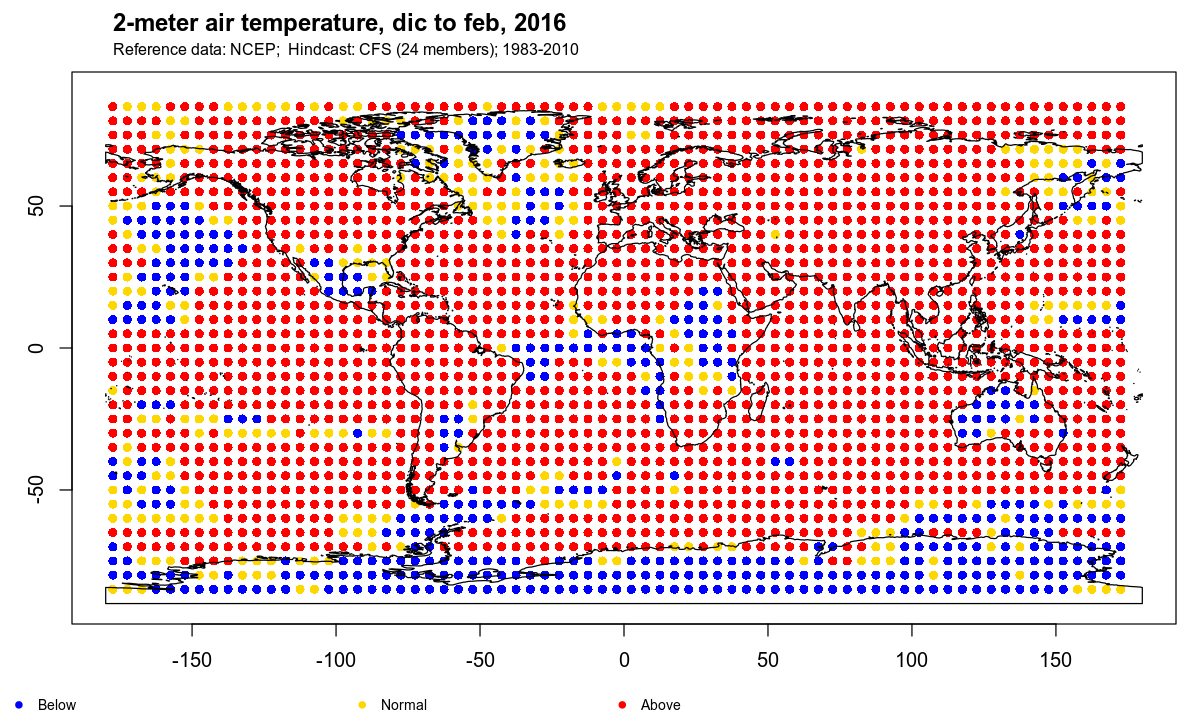

In [5]:
options(repr.plot.width=10, repr.plot.height=6)
bubblePlot(hindcast, obs, forecast = forecast,
           bubble.size = 1.5,
           subtitle = subtitle,
           size.as.probability = FALSE, score = FALSE
)

We can now use the size of the bubble to indicate the probability of the most likely tercile. Bubble size for different forecast probabilities are represented in the legend for reference. 

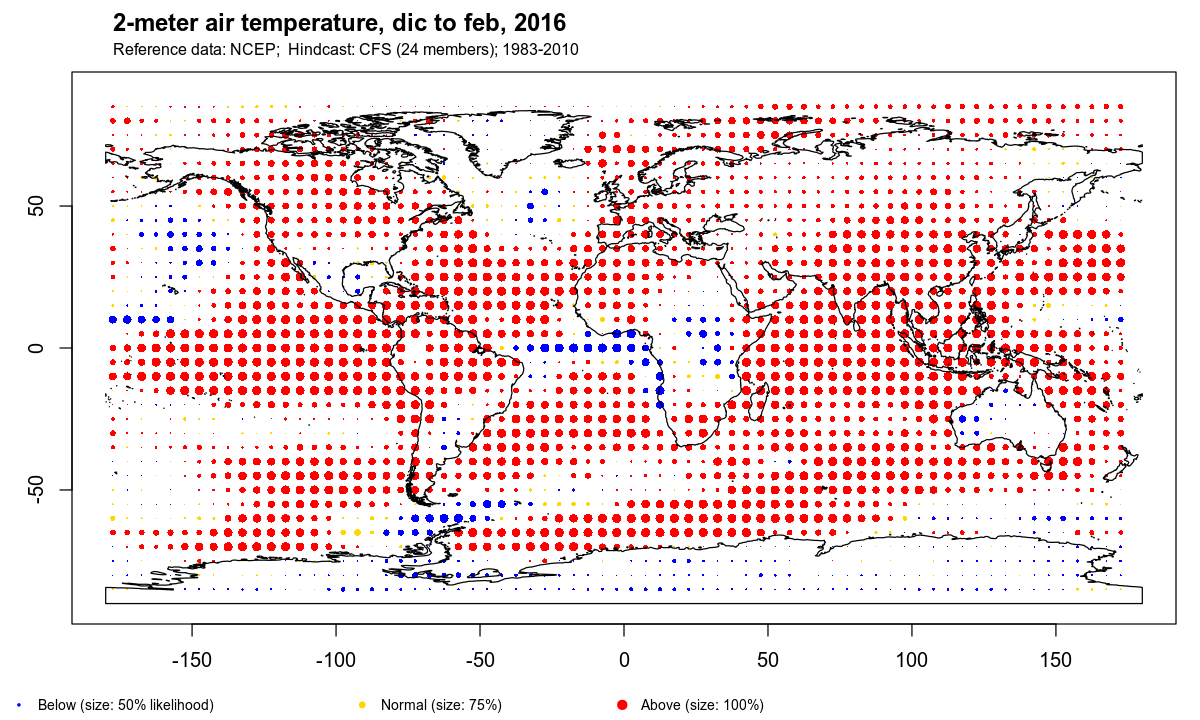

In [6]:
bubblePlot(hindcast, obs, forecast = forecast,
           bubble.size = 1.5,
           subtitle = subtitle,
           size.as.probability = TRUE, score = FALSE
)

The information shown above only involves the forecast for a particular season (winter 2016); the hindcast has only been used to provide reference terciles. This signal, however, is not useful unless we have information about the skill of the seasonal forecast system, which can be evaluated using the whole hindcast period available along with observations. The optional argument `score = TRUE` (this is the default) allows to evaluate the forecast system by computing the Relative Operating Characteristic skill score (ROCSS). This is represented as the transparency of the bubbles. Forecasts where past skill is worse than the climatology (negative ROCSS) are whitened out. NCEP Reanalysis data is considered as reference to compute the skill score.

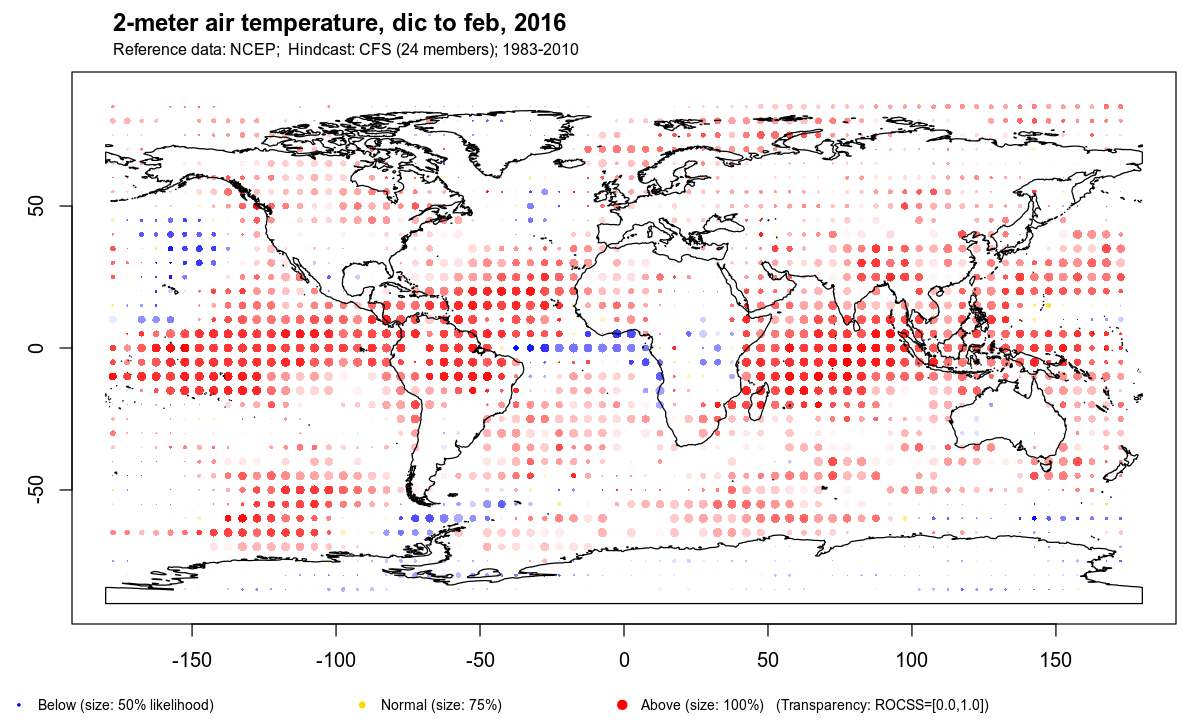

In [7]:
bubblePlot(hindcast, obs, forecast = forecast,
           bubble.size = 1.5,
           subtitle = subtitle,
           size.as.probability = TRUE, score = TRUE
)

Finally, we can increase contrast on actionable ROCSS values and white out low skill regions, where the system can show statistically significant skill, but cannot be trusted for decision-making. In the example below, the transparency range only covers ROCSS values from 0.5 to 1.

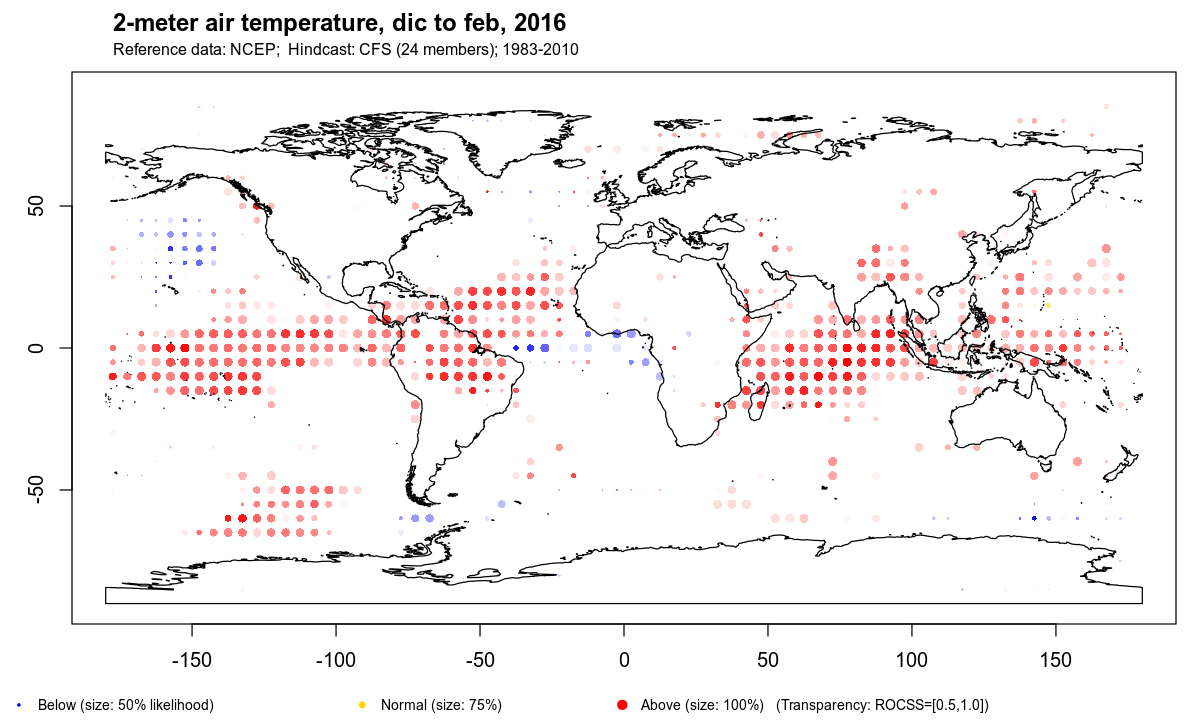

In [8]:
bubblePlot(hindcast, obs, forecast = forecast,
           bubble.size = 1.5,
           subtitle = subtitle,
           size.as.probability = TRUE, score = TRUE, score.range=c(0.5,1)
)

## Cropping the North Atlantic region

In [9]:
crop.natl <- function(x) subsetGrid(x, lonLim = c(-80, 42), latLim = c(35, 72))
hindcast.natl <- crop.natl(hindcast)
forecast.natl <- crop.natl(forecast)
obs.natl <- crop.natl(obs)

Replacing bubbles by sectors of a 3-piece pie chart indicating the probability of each tercile.

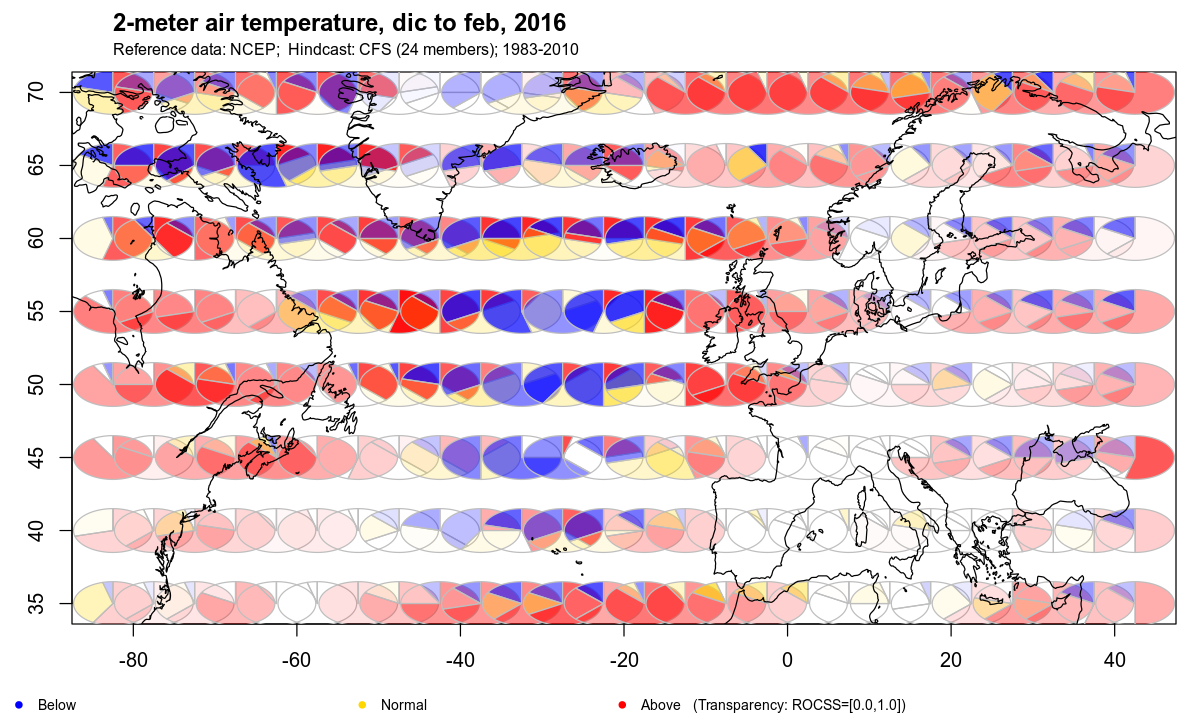

In [10]:
bubblePlot(hindcast.natl, obs.natl, forecast = forecast.natl,
           bubble.size = 1.5,
           subtitle = subtitle,
           piechart = TRUE, score = TRUE
)

## Tercile plot

Cropping El Niño 3.4 region

In [11]:
crop.nino <- function(x) subsetGrid(x, lonLim = c(-170, -120), latLim = c(-5, 5))
hindcast.nino <- crop.nino(hindcast)
obs.nino <- crop.nino(obs)
forecast.nino <- crop.nino(forecast)

Warning message in spatialMean(hindcast):
“The results presented are the spatial mean of the input field”
Warning message in spatialMean(obs):
“The results presented are the spatial mean of the input field”
Warning message in spatialMean(forecast):
“The results presented are the spatial mean of the input field”


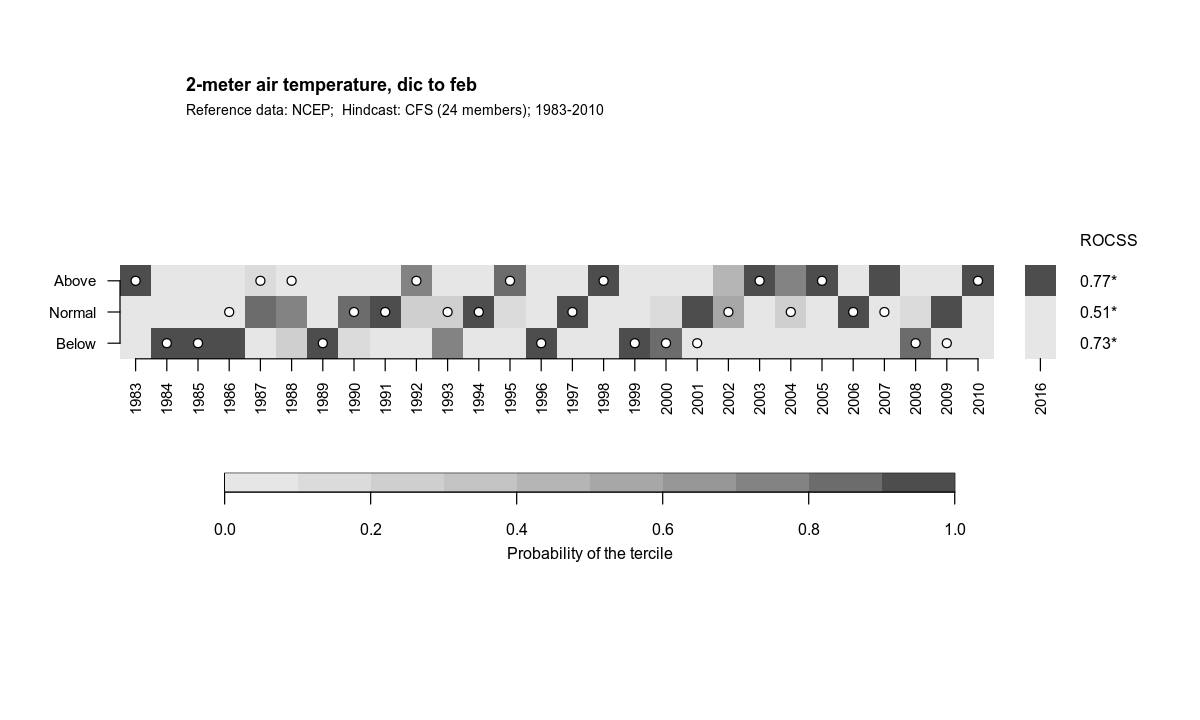

In [12]:
tercilePlot(hindcast.nino, obs.nino, forecast = forecast.nino, subtitle = subtitle)

## Tercile bar plot

Plot for winter 2016 (forecast data)

Warning message in spatialMean(hindcast):
“The results presented are the spatial mean of the input field”
Warning message in spatialMean(obs):
“The results presented are the spatial mean of the input field”
Warning message in spatialMean(forecast):
“The results presented are the spatial mean of the input field”


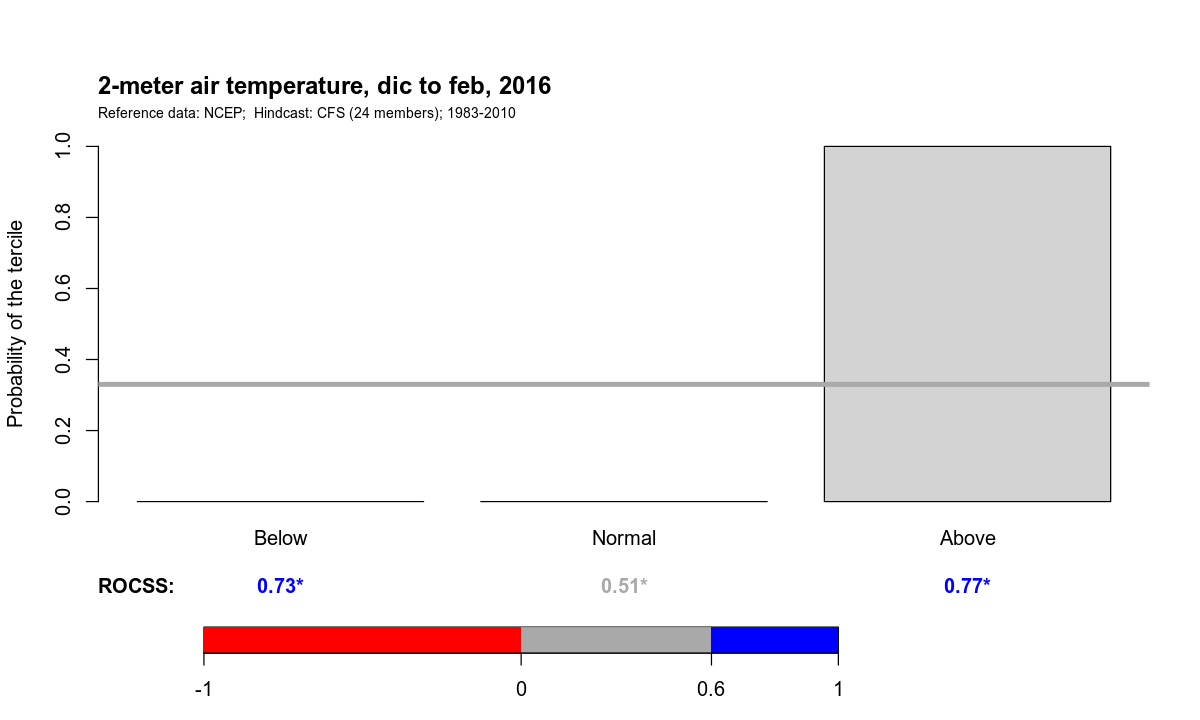

In [13]:
tercileBarplot(hindcast.nino, obs.nino, forecast = forecast.nino, score.threshold = 0.6,
               subtitle = subtitle)

Plot for winter 2002 (selected from the hindcast)

Warning message in spatialMean(hindcast):
“The results presented are the spatial mean of the input field”
Warning message in spatialMean(obs):
“The results presented are the spatial mean of the input field”
Warning message in spatialMean(forecast):
“The results presented are the spatial mean of the input field”


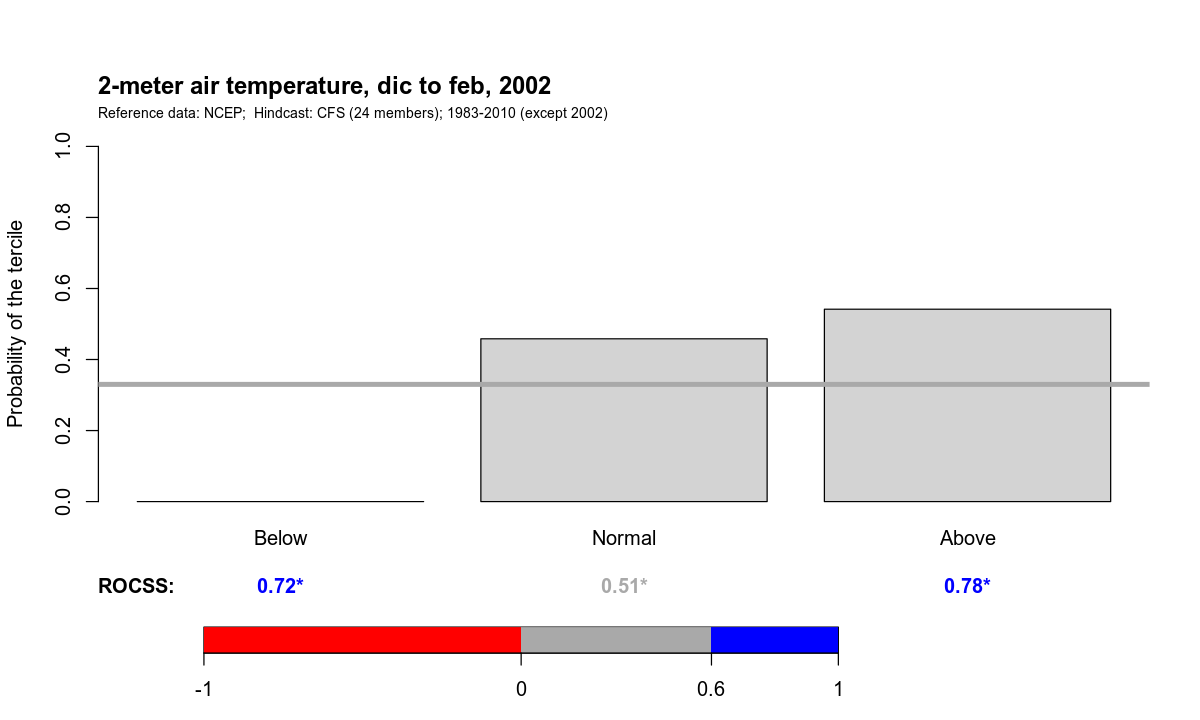

In [14]:
year.target <- 2002
subtitle_year.target <- sprintf("Reference data: NCEP;  Hindcast: CFS (%d members); %d-%d (except %d)", 
                                length(hindcast$Members), getYearsAsINDEX(hindcast)[1],
                                tail(getYearsAsINDEX(hindcast),1), year.target)
tercileBarplot(hindcast.nino, obs.nino, year.target = year.target, score.threshold = 0.6,
               subtitle = subtitle_year.target)

## Reliability categories

Diagram (Figure 5 in the article)

[2022-08-30 21:44:06] Calculating categories for region 1 out of 1

...[2022-08-30 21:44:06] Computing bootstrapping...

...[2022-08-30 21:44:28] Done.

The input grid is a climatology: temporal resolution set to 'unknown'

The input grid is a climatology: temporal resolution set to 'unknown'

The input grid is a climatology: temporal resolution set to 'unknown'

[2022-08-30 21:44:28] Done.



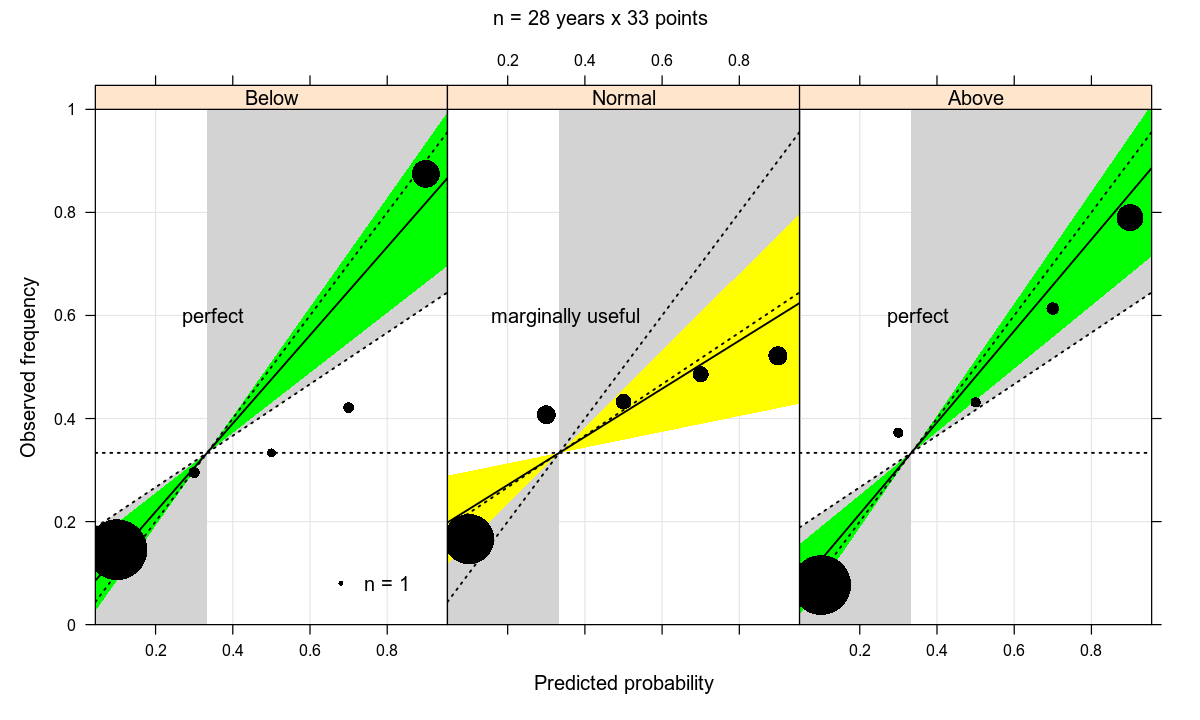

In [15]:
rl.nino <- reliabilityCategories(hindcast.nino, obs.nino, 
                                 n.events = 3, labels = c("Below", "Normal", "Above"), n.bins = 5,
                                 n.boot = 1000, conf.level = 0.9,
                                 cex0 = 0.5, cex.scale = 20
) 

Map (Figure 6 in the article)

[2022-08-30 21:44:28] Calculating categories for region 1 out of 31

...[2022-08-30 21:44:28] Computing bootstrapping...

...[2022-08-30 21:44:54] Done.

[2022-08-30 21:44:54] Calculating categories for region 2 out of 31

...[2022-08-30 21:44:54] Computing bootstrapping...

...[2022-08-30 21:45:16] Done.

[2022-08-30 21:45:16] Calculating categories for region 3 out of 31

...[2022-08-30 21:45:16] Computing bootstrapping...

...[2022-08-30 21:45:33] Done.

[2022-08-30 21:45:33] Calculating categories for region 4 out of 31

...[2022-08-30 21:45:33] Computing bootstrapping...

...[2022-08-30 21:45:46] Done.

[2022-08-30 21:45:46] Calculating categories for region 5 out of 31

...[2022-08-30 21:45:46] Computing bootstrapping...

...[2022-08-30 21:46:01] Done.

[2022-08-30 21:46:01] Calculating categories for region 6 out of 31

...[2022-08-30 21:46:01] Computing bootstrapping...

...[2022-08-30 21:46:18] Done.

[2022-08-30 21:46:18] Calculating categories for region 7 out of 31

...[202

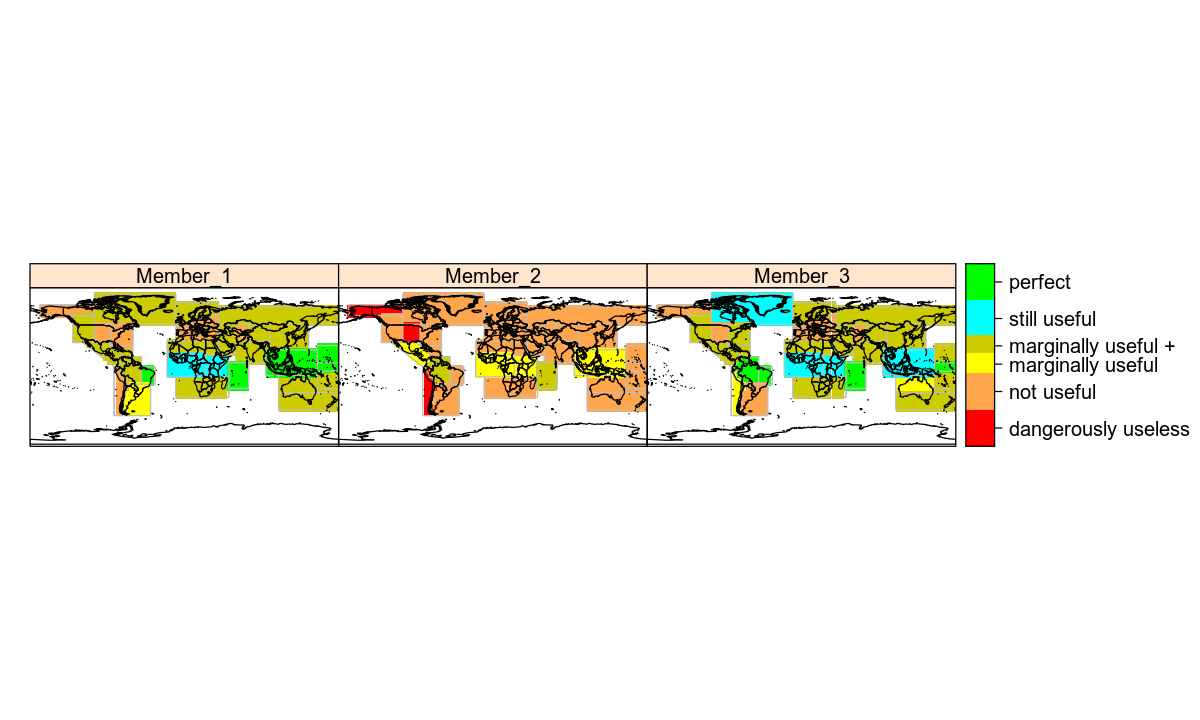

In [16]:
rl.map <- reliabilityCategories(hindcast, obs, 
                                n.events = 3, labels = c("Below", "Normal", "Above"), n.bins = 5,
                                n.boot = 1000, conf.level = 0.9,
                                regions = AR5regions)

## UDG data access

NOTE that data loading from the ECOMS-UDG may take up to a few hours depending on several factors 
(network traffic, temporal and spatial resolution, etc). Daily data for this section can be also 
retrieved from: 
http://meteo.unican.es/work/visualizeR/data/tas.cfs.dly.rda
http://meteo.unican.es/work/visualizeR/data/tas.cfs.operative.dly.2016.rda

In [18]:
library(loadeR.ECOMS)
# UDG Authentification
# loginUDG(username = "", password = "") # Note username and password obtained from the UDG registration. 
do.call(loginUDG, as.list(readLines("udg_login.txt")))

[2022-08-30 22:03:01] Setting credentials...

[2022-08-30 22:03:02] Success!
Go to <https://data.meteo.unican.es/udg-tap/home> for details on your authorized groups and datasets



Load reanalysis, hindcast and operational forecast daily data (for boreal winter 2016):

In [ ]:
tas.ncep.dly <- loadECOMS(dataset = "NCEP_reanalysis1",
                          var = "tas",
                          years = 1983:2010, season = c(12, 1, 2), time = "DD", aggr.d = "mean",
                          lonLim = c(-170, -120), latLim = c(-5, 5)
)  
tas.cfs.dly <- loadECOMS(dataset = "CFSv2_seasonal",
                         var = "tas",
                         years = 1983:2010, season = c(12, 1, 2), time = "DD", aggr.d = "mean",
                         lonLim = c(-170, -120), latLim = c(-5, 5),
                         leadMonth = 1, members = 1:24     # note 'leadMonth' and 'members'
)            
tas.cfs.operative.dly.2016 <- loadECOMS(dataset = "CFSv2_seasonal_operative",
                                        var = "tas",
                                        years = 2016, season = c(12, 1, 2), time = "DD", aggr.d = "mean",
                                        lonLim = c(-170, -120), latLim = c(-5, 5),
                                        leadMonth = 1, members = 1:24     # note 'leadMonth' and 'members'
)

[2022-08-30 22:04:36] Defining harmonization parameters for variable "tas"

[2022-08-30 22:04:37] Opening dataset...

[2022-08-30 22:04:48] The dataset was successfuly opened

[2022-08-30 22:04:48] Defining geo-location parameters

[2022-08-30 22:04:48] Defining time selection parameters

NOTE: Daily aggregation will be computed from 6-hourly data

[2022-08-30 22:04:48] Retrieving data subset ...



# Spread plots

Plot for winter 2016 (forecast data)

In [ ]:
spreadPlot(tas.cfs.dly, forecast = tas.cfs.operative.dly.2016, boxplot = TRUE)

Plot for winter 2002 (year selected from the hindcast)

In [ ]:
spreadPlot(tas.cfs.dly, year.target = 2002, violin = TRUE)